In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [137]:
from scipy.stats import chi2_contingency, fisher_exact
from IPython.display import display


In [29]:
data = pd.read_csv('PCC.individual.project.data.csv')


In [30]:
data.head()


,STUDYID,RPT,time,death,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,...,AGEGRP2,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro
0,ASC,ASC-001-0003,585,1,28.7000,172.72,85.73000,5.733341,2.944439,3.258097,...,1,0,1,0,0,0,0,0,0,0
1,ASC,ASC-001-0004,495,1,25.3000,171.80,74.80000,6.269096,2.708050,3.295837,...,2,0,0,0,1,0,0,0,0,0
2,ASC,ASC-001-0005,167,1,26.2000,167.90,73.90000,5.068904,2.639057,2.890372,...,1,0,0,0,1,0,0,0,0,0
3,ASC,ASC-001-0008,161,1,26.9915,166.70,83.50879,4.812184,3.761200,3.688879,...,2,0,0,0,1,0,0,0,0,0
4,ASC,ASC-001-0009,575,0,46.5000,175.60,143.30000,3.496508,2.944439,3.258097,...,1,0,0,0,1,0,0,0,0,0


In [138]:
# list(data.columns)

## Clean Data to get event free survival

In [32]:
def get_risk(patient):
    if patient.death == 1 and patient.time < 365:
        # Patient is high risk
        return 1
    elif patient.death == 0 and patient.time > 730:
        # Patient is low risk
        return 0
    else:
        # Patient needs to be dropped, insufficient data
        return 'drop'


In [33]:
data.apply(get_risk, axis=1)

0       drop
1       drop
2          1
3          1
4       drop
        ... 
1595    drop
1596       0
1597       0
1598    drop
1599       0
Length: 1600, dtype: object

In [34]:
data['high_risk'] = data.apply(get_risk, axis=1)
data = data.loc[lambda patient: patient.high_risk != 'drop']


In [35]:
data = data.drop(['time', 'death'], axis=1)

In [36]:
data.head()

,STUDYID,RPT,BMI,HEIGHTBL,WEIGHTBL,ALP,ALT,AST,CA,CREAT,...,RaceAsian,RaceBlack,RaceOther,RaceWhite,RegionAsia,RegionEastEuro,RegionNorthAmer,RegionSouthAmer,RegionWestEuro,high_risk
2,ASC,ASC-001-0005,26.2000,167.9,73.90000,5.068904,2.639057,2.890372,2.27,4.663439,...,0,0,0,1,0,0,0,0,0,1
3,ASC,ASC-001-0008,26.9915,166.7,83.50879,4.812184,3.761200,3.688879,2.20,4.820282,...,0,0,0,1,0,0,0,0,0,1
6,ASC,ASC-001-0013,32.2000,176.9,100.70000,4.941642,2.772589,3.044522,2.45,4.574711,...,0,0,0,1,0,0,0,0,0,1
16,ASC,ASC-003-0002,25.8000,163.0,68.60000,6.306275,5.135798,5.521461,2.25,4.574711,...,0,0,0,1,0,0,0,0,0,1
21,ASC,ASC-003-0009,25.1000,178.0,79.60000,6.511745,2.079442,3.526361,2.25,5.123964,...,0,0,0,1,0,0,0,0,0,1


/Users/belalelsiesy/opt/anaconda3/envs/DataViz/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='high_risk', ylabel='count'>

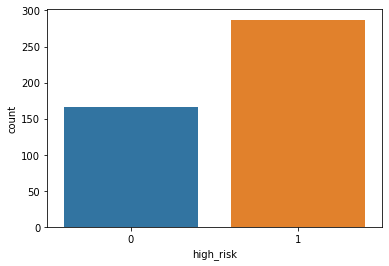

In [37]:
sns.countplot(data['high_risk'])

## Race

In [40]:
race = ['RaceAsian',
        'RaceBlack',
        'RaceOther',
        'RaceWhite']


In [41]:
def get_race(data):
    if data['RaceWhite'] == 1:
        return 'White'
    elif data['RaceBlack'] == 1:
        return 'Black'
    elif data['RaceAsian'] == 1:
        return 'Asian'
    else:
        return 'Other'

In [42]:
data['Race'] = data[race].apply(get_race, axis=1)


In [48]:
race_table = pd.crosstab(index=data['high_risk'], columns=data['Race'], margins=True)
race_table

Race,Asian,Black,Other,White,All
high_risk,,,,,
0,9,4,3,150,166
1,6,11,14,256,287
All,15,15,17,406,453


In [70]:
chi = chi2_contingency(race_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])


chi2:  6.83 
 p:  0.56 
 dof:  8.00 
 expected: 
[[  5.49668874   5.49668874   6.22958057 148.77704194 166.        ]
 [  9.50331126   9.50331126  10.77041943 257.22295806 287.        ]
 [ 15.          15.          17.         406.         453.        ]]


## Region

In [71]:
region = ['RegionAsia',
          'RegionEastEuro',
          'RegionNorthAmer',
          'RegionSouthAmer',
          'RegionWestEuro']


In [72]:
def get_region(data):
    if data['RegionAsia'] == 1:
        return 'Asia'
    elif data['RegionEastEuro'] == 1:
        return 'EastEuro'
    elif data['RegionNorthAmer'] == 1:
        return 'NorthAmer'
    elif data['RegionSouthAmer'] == 1:
        return 'SouthAmer'
    else:
        return 'WestEuro'


In [73]:
data['Region'] = data[region].apply(get_region, axis=1)


In [74]:
region_table = pd.crosstab(
    index=data['high_risk'], columns=data['Region'], margins=True)
region_table


Region,EastEuro,NorthAmer,SouthAmer,WestEuro,All
high_risk,,,,,
0,26,23,25,92,166
1,50,37,19,181,287
All,76,60,44,273,453


In [81]:
chi = chi2_contingency(region_table)
print("chi2:  %.2f \n p:  %.2f \n dof:  %.2f \n expected: " % (chi[0], chi[1],chi[2]))
print(chi[3])

chi2:  9.00 
 p:  0.34 
 dof:  8.00 
 expected: 
[[ 27.84988962  21.98675497  16.12362031 100.0397351  166.        ]
 [ 48.15011038  38.01324503  27.87637969 172.9602649  287.        ]
 [ 76.          60.          44.         273.         453.        ]]


In [98]:
for i in range(101):
    print(" {0} - {1}".format(data.columns[i], data.iloc[200][i]))

 STUDYID - VEN
 RPT - VEN-206108302
 BMI - 23.1
 HEIGHTBL - 172.0
 WEIGHTBL - 68.4
 ALP - 4.094344562
 ALT - 2.564949357
 AST - 3.295836866
 CA - 2.44
 CREAT - 4.553876892
 HB - 12.3
 LDH - 5.319077385
 NEU - 1.481604541
 PLT - 379.0
 PSA - 2.424802726
 TBILI - 2.079441542
 TESTO - -0.510825624
 WBC - 2.054123734
 CREACL - 4.019553818
 NA. - 137.0
 MG - 0.019802627
 PHOS - 0.223143551
 ALB - 41.0
 TPRO - 76.0
 RBC - 4.117353118
 LYM - 0.548373617
 BUN - 1.940419546
 CCRC - 4.304551461
 GLU - 1.609437912
 SYSTOLICBP - 149.0
 DIASTOLICBP - 88.0
 PULSE - 77.55306968
 HEMAT - 0.374200879
 SPEGRA - 1.020414053
 LYMperLEU - 25.5447914
 MONO - 0.407112496
 MONOperLEU - 6.451450572
 NEUperLEU - 63.428814
 POT - 4.6
 BASOperLEU - 0.447677497
 EOS - 0.112579001
 EOSperLEU - 1.907101051
 TARGET - 0
 LYMPH_NODES - 0
 KIDNEYS - 0
 LUNGS - 1
 LIVER - 0
 PLEURA - 1
 OTHER - 0
 PROSTATE - 0
 ORCHIDECTOMY - 0
 PROSTATECTOMY - 0
 LYMPHADENECTOMY - 0
 BILATERAL_ORCHIDECTOMY - 0
 PRIOR_RADIOTHERAPY - 1
 A

# Chi-Square Test for Binary Variables

In [129]:
binary_stats = pd.DataFrame(columns=['Name', 'chi-2','p-Value' ])


In [127]:
# binary_stats.loc[len(binary_stats.index)] = ['Hello',0.05, 6.07]


In [130]:
def analyse_binary(name):
    print(name)
    table = pd.crosstab(index=data['high_risk'], columns=data[name], margins=True)
    display(table)
    chi = chi2_contingency(table)
    binary_stats.loc[len(binary_stats.index)] = [name, chi[0], chi[1]]
    print("chi2:  %.2f \n p:  %.2f \n dof:  %.f \n expected: " %(chi[0], chi[1], chi[2]))
    print(chi[3])
    print('\n')
    print('\n')


In [112]:
binary = ['TARGET',
'LYMPH_NODES',
'KIDNEYS',
'LUNGS',
'LIVER',
'PLEURA',
'OTHER',
'PROSTATE',
'ORCHIDECTOMY',
'PROSTATECTOMY',
'LYMPHADENECTOMY',
'BILATERAL_ORCHIDECTOMY',
'PRIOR_RADIOTHERAPY',
'ANALGESICS',
'ANTI_ANDROGENS',
'GLUCOCORTICOID',
'GONADOTROPIN',
'BISPHOSPHONATE',
'CORTICOSTEROID',
'IMIDAZOLE',
'ACE_INHIBITORS',
'BETA_BLOCKING',
'HMG_COA_REDUCT',
'ESTROGENS',
'ANTI_ESTROGENS',
'CEREBACC',
'CHF',
'DVT',
'DIAB',
'MI',
'PULMEMB',
'SPINCOMP',
'COPD',
'MHBLOOD',
'MHCARD',
'MHCONGEN',
'MHEAR',
'MHENDO',
'MHGASTRO',
'MHHEPATO',
'MHIMMUNE',
'MHINFECT',
'MHINJURY',
'MHINVEST',
'MHMETAB',
'MHPSYCH',
'MHRENAL',
'MHRESP',
'MHSKIN',
'MHVASC',
'ECOG_C',
'AGEGRP2'
]

In [131]:
for feature in binary:
    analyse_binary(feature)

TARGET


TARGET,0,1,All
high_risk,,,
0,81,85,166
1,145,142,287
All,226,227,453


chi2:  0.13 
 p:  1.00 
 dof:  4 
 expected: 
[[ 82.81677704  83.18322296 166.        ]
 [143.18322296 143.81677704 287.        ]
 [226.         227.         453.        ]]




LYMPH_NODES


LYMPH_NODES,0,1,All
high_risk,,,
0,83,83,166
1,138,149,287
All,221,232,453


chi2:  0.15 
 p:  1.00 
 dof:  4 
 expected: 
[[ 80.98454746  85.01545254 166.        ]
 [140.01545254 146.98454746 287.        ]
 [221.         232.         453.        ]]




KIDNEYS


KIDNEYS,0,1,All
high_risk,,,
0,164,2,166
1,284,3,287
All,448,5,453


chi2:  0.02 
 p:  1.00 
 dof:  4 
 expected: 
[[164.16777042   1.83222958 166.        ]
 [283.83222958   3.16777042 287.        ]
 [448.           5.         453.        ]]




LUNGS


LUNGS,0,1,All
high_risk,,,
0,143,23,166
1,249,38,287
All,392,61,453


chi2:  0.03 
 p:  1.00 
 dof:  4 
 expected: 
[[143.64679912  22.35320088 166.        ]
 [248.35320088  38.64679912 287.        ]
 [392.          61.         453.        ]]




LIVER


LIVER,0,1,All
high_risk,,,
0,157,9,166
1,249,38,287
All,406,47,453


chi2:  6.91 
 p:  0.14 
 dof:  4 
 expected: 
[[148.77704194  17.22295806 166.        ]
 [257.22295806  29.77704194 287.        ]
 [406.          47.         453.        ]]




PLEURA


PLEURA,0,1,All
high_risk,,,
0,164,2,166
1,278,9,287
All,442,11,453


chi2:  1.66 
 p:  0.80 
 dof:  4 
 expected: 
[[161.96909492   4.03090508 166.        ]
 [280.03090508   6.96909492 287.        ]
 [442.          11.         453.        ]]




OTHER


OTHER,0,1,All
high_risk,,,
0,165,1,166
1,279,8,287
All,444,9,453


chi2:  2.58 
 p:  0.63 
 dof:  4 
 expected: 
[[162.70198675   3.29801325 166.        ]
 [281.29801325   5.70198675 287.        ]
 [444.           9.         453.        ]]




PROSTATE


PROSTATE,0,1,All
high_risk,,,
0,142,24,166
1,262,25,287
All,404,49,453


chi2:  3.60 
 p:  0.46 
 dof:  4 
 expected: 
[[148.04415011  17.95584989 166.        ]
 [255.95584989  31.04415011 287.        ]
 [404.          49.         453.        ]]




ORCHIDECTOMY


ORCHIDECTOMY,0,1,All
high_risk,,,
0,129,37,166
1,229,58,287
All,358,95,453


chi2:  0.27 
 p:  0.99 
 dof:  4 
 expected: 
[[131.18763797  34.81236203 166.        ]
 [226.81236203  60.18763797 287.        ]
 [358.          95.         453.        ]]




PROSTATECTOMY


PROSTATECTOMY,0,1,All
high_risk,,,
0,113,53,166
1,219,68,287
All,332,121,453


chi2:  3.64 
 p:  0.46 
 dof:  4 
 expected: 
[[121.66004415  44.33995585 166.        ]
 [210.33995585  76.66004415 287.        ]
 [332.         121.         453.        ]]




LYMPHADENECTOMY


LYMPHADENECTOMY,0,1,All
high_risk,,,
0,138,28,166
1,261,26,287
All,399,54,453


chi2:  6.11 
 p:  0.19 
 dof:  4 
 expected: 
[[146.21192053  19.78807947 166.        ]
 [252.78807947  34.21192053 287.        ]
 [399.          54.         453.        ]]




BILATERAL_ORCHIDECTOMY


BILATERAL_ORCHIDECTOMY,0,1,All
high_risk,,,
0,130,36,166
1,244,43,287
All,374,79,453


chi2:  3.28 
 p:  0.51 
 dof:  4 
 expected: 
[[137.05077263  28.94922737 166.        ]
 [236.94922737  50.05077263 287.        ]
 [374.          79.         453.        ]]




PRIOR_RADIOTHERAPY


PRIOR_RADIOTHERAPY,0,1,All
high_risk,,,
0,77,89,166
1,129,158,287
All,206,247,453


chi2:  0.09 
 p:  1.00 
 dof:  4 
 expected: 
[[ 75.48785872  90.51214128 166.        ]
 [130.51214128 156.48785872 287.        ]
 [206.         247.         453.        ]]




ANALGESICS


ANALGESICS,0,1,All
high_risk,,,
0,136,30,166
1,174,113,287
All,310,143,453


chi2:  22.09 
 p:  0.00 
 dof:  4 
 expected: 
[[113.598234  52.401766 166.      ]
 [196.401766  90.598234 287.      ]
 [310.       143.       453.      ]]




ANTI_ANDROGENS


ANTI_ANDROGENS,0,1,All
high_risk,,,
0,16,150,166
1,31,256,287
All,47,406,453


chi2:  0.15 
 p:  1.00 
 dof:  4 
 expected: 
[[ 17.22295806 148.77704194 166.        ]
 [ 29.77704194 257.22295806 287.        ]
 [ 47.         406.         453.        ]]




GLUCOCORTICOID


GLUCOCORTICOID,0,1,All
high_risk,,,
0,117,49,166
1,174,113,287
All,291,162,453


chi2:  4.45 
 p:  0.35 
 dof:  4 
 expected: 
[[106.63576159  59.36423841 166.        ]
 [184.36423841 102.63576159 287.        ]
 [291.         162.         453.        ]]




GONADOTROPIN


GONADOTROPIN,0,1,All
high_risk,,,
0,25,141,166
1,49,238,287
All,74,379,453


chi2:  0.31 
 p:  0.99 
 dof:  4 
 expected: 
[[ 27.11699779 138.88300221 166.        ]
 [ 46.88300221 240.11699779 287.        ]
 [ 74.         379.         453.        ]]




BISPHOSPHONATE


BISPHOSPHONATE,0,1,All
high_risk,,,
0,93,73,166
1,172,115,287
All,265,188,453


chi2:  0.66 
 p:  0.96 
 dof:  4 
 expected: 
[[ 97.10816777  68.89183223 166.        ]
 [167.89183223 119.10816777 287.        ]
 [265.         188.         453.        ]]




CORTICOSTEROID


CORTICOSTEROID,0,1,All
high_risk,,,
0,123,43,166
1,244,43,287
All,367,86,453


chi2:  8.16 
 p:  0.09 
 dof:  4 
 expected: 
[[134.48565121  31.51434879 166.        ]
 [232.51434879  54.48565121 287.        ]
 [367.          86.         453.        ]]




IMIDAZOLE


IMIDAZOLE,0,1,All
high_risk,,,
0,153,13,166
1,264,23,287
All,417,36,453


chi2:  0.00 
 p:  1.00 
 dof:  4 
 expected: 
[[152.80794702  13.19205298 166.        ]
 [264.19205298  22.80794702 287.        ]
 [417.          36.         453.        ]]




ACE_INHIBITORS


ACE_INHIBITORS,0,1,All
high_risk,,,
0,122,44,166
1,229,58,287
All,351,102,453


chi2:  2.39 
 p:  0.66 
 dof:  4 
 expected: 
[[128.62251656  37.37748344 166.        ]
 [222.37748344  64.62251656 287.        ]
 [351.         102.         453.        ]]




BETA_BLOCKING


BETA_BLOCKING,0,1,All
high_risk,,,
0,134,32,166
1,227,60,287
All,361,92,453


chi2:  0.17 
 p:  1.00 
 dof:  4 
 expected: 
[[132.28697572  33.71302428 166.        ]
 [228.71302428  58.28697572 287.        ]
 [361.          92.         453.        ]]




HMG_COA_REDUCT


HMG_COA_REDUCT,0,1,All
high_risk,,,
0,126,40,166
1,221,66,287
All,347,106,453


chi2:  0.07 
 p:  1.00 
 dof:  4 
 expected: 
[[127.15673289  38.84326711 166.        ]
 [219.84326711  67.15673289 287.        ]
 [347.         106.         453.        ]]




ESTROGENS


ESTROGENS,0,1,All
high_risk,,,
0,140,26,166
1,264,23,287
All,404,49,453


chi2:  6.38 
 p:  0.17 
 dof:  4 
 expected: 
[[148.04415011  17.95584989 166.        ]
 [255.95584989  31.04415011 287.        ]
 [404.          49.         453.        ]]




ANTI_ESTROGENS


ANTI_ESTROGENS,0,1,All
high_risk,,,
0,163,3,166
1,285,2,287
All,448,5,453


chi2:  1.19 
 p:  0.88 
 dof:  4 
 expected: 
[[164.16777042   1.83222958 166.        ]
 [283.83222958   3.16777042 287.        ]
 [448.           5.         453.        ]]




CEREBACC


CEREBACC,0,1,All
high_risk,,,
0,162,4,166
1,280,7,287
All,442,11,453


chi2:  0.00 
 p:  1.00 
 dof:  4 
 expected: 
[[161.96909492   4.03090508 166.        ]
 [280.03090508   6.96909492 287.        ]
 [442.          11.         453.        ]]




CHF


CHF,0,1,All
high_risk,,,
0,165,1,166
1,279,8,287
All,444,9,453


chi2:  2.58 
 p:  0.63 
 dof:  4 
 expected: 
[[162.70198675   3.29801325 166.        ]
 [281.29801325   5.70198675 287.        ]
 [444.           9.         453.        ]]




DVT


DVT,0,1,All
high_risk,,,
0,163,3,166
1,280,7,287
All,443,10,453


chi2:  0.19 
 p:  1.00 
 dof:  4 
 expected: 
[[162.33554084   3.66445916 166.        ]
 [280.66445916   6.33554084 287.        ]
 [443.          10.         453.        ]]




DIAB


DIAB,0,1,All
high_risk,,,
0,135,31,166
1,228,59,287
All,363,90,453


chi2:  0.23 
 p:  0.99 
 dof:  4 
 expected: 
[[133.01986755  32.98013245 166.        ]
 [229.98013245  57.01986755 287.        ]
 [363.          90.         453.        ]]




MI


MI,0,1,All
high_risk,,,
0,162,4,166
1,262,25,287
All,424,29,453


chi2:  6.97 
 p:  0.14 
 dof:  4 
 expected: 
[[155.37306843  10.62693157 166.        ]
 [268.62693157  18.37306843 287.        ]
 [424.          29.         453.        ]]




PULMEMB


PULMEMB,0,1,All
high_risk,,,
0,166,0,166
1,282,5,287
All,448,5,453


chi2:  2.92 
 p:  0.57 
 dof:  4 
 expected: 
[[164.16777042   1.83222958 166.        ]
 [283.83222958   3.16777042 287.        ]
 [448.           5.         453.        ]]




SPINCOMP


SPINCOMP,0,1,All
high_risk,,,
0,165,1,166
1,285,2,287
All,450,3,453


chi2:  0.01 
 p:  1.00 
 dof:  4 
 expected: 
[[164.90066225   1.09933775 166.        ]
 [285.09933775   1.90066225 287.        ]
 [450.           3.         453.        ]]




COPD


COPD,0,1,All
high_risk,,,
0,164,2,166
1,280,7,287
All,444,9,453


chi2:  0.82 
 p:  0.94 
 dof:  4 
 expected: 
[[162.70198675   3.29801325 166.        ]
 [281.29801325   5.70198675 287.        ]
 [444.           9.         453.        ]]




MHBLOOD


MHBLOOD,0,1,All
high_risk,,,
0,162,4,166
1,271,16,287
All,433,20,453


chi2:  2.50 
 p:  0.65 
 dof:  4 
 expected: 
[[158.67108168   7.32891832 166.        ]
 [274.32891832  12.67108168 287.        ]
 [433.          20.         453.        ]]




MHCARD


MHCARD,0,1,All
high_risk,,,
0,140,26,166
1,221,66,287
All,361,92,453


chi2:  3.50 
 p:  0.48 
 dof:  4 
 expected: 
[[132.28697572  33.71302428 166.        ]
 [228.71302428  58.28697572 287.        ]
 [361.          92.         453.        ]]




MHCONGEN


MHCONGEN,0,1,All
high_risk,,,
0,162,4,166
1,282,5,287
All,444,9,453


chi2:  0.24 
 p:  0.99 
 dof:  4 
 expected: 
[[162.70198675   3.29801325 166.        ]
 [281.29801325   5.70198675 287.        ]
 [444.           9.         453.        ]]




MHEAR


MHEAR,0,1,All
high_risk,,,
0,159,7,166
1,283,4,287
All,442,11,453


chi2:  3.54 
 p:  0.47 
 dof:  4 
 expected: 
[[161.96909492   4.03090508 166.        ]
 [280.03090508   6.96909492 287.        ]
 [442.          11.         453.        ]]




MHENDO


MHENDO,0,1,All
high_risk,,,
0,160,6,166
1,283,4,287
All,443,10,453


chi2:  2.40 
 p:  0.66 
 dof:  4 
 expected: 
[[162.33554084   3.66445916 166.        ]
 [280.66445916   6.33554084 287.        ]
 [443.          10.         453.        ]]




MHGASTRO


MHGASTRO,0,1,All
high_risk,,,
0,117,49,166
1,208,79,287
All,325,128,453


chi2:  0.21 
 p:  1.00 
 dof:  4 
 expected: 
[[119.09492274  46.90507726 166.        ]
 [205.90507726  81.09492274 287.        ]
 [325.         128.         453.        ]]




MHHEPATO


MHHEPATO,0,1,All
high_risk,,,
0,160,6,166
1,279,8,287
All,439,14,453


chi2:  0.24 
 p:  0.99 
 dof:  4 
 expected: 
[[160.86975717   5.13024283 166.        ]
 [278.13024283   8.86975717 287.        ]
 [439.          14.         453.        ]]




MHIMMUNE


MHIMMUNE,0,1,All
high_risk,,,
0,165,1,166
1,280,7,287
All,445,8,453


chi2:  2.04 
 p:  0.73 
 dof:  4 
 expected: 
[[163.06843267   2.93156733 166.        ]
 [281.93156733   5.06843267 287.        ]
 [445.           8.         453.        ]]




MHINFECT


MHINFECT,0,1,All
high_risk,,,
0,148,18,166
1,252,35,287
All,400,53,453


chi2:  0.19 
 p:  1.00 
 dof:  4 
 expected: 
[[146.57836645  19.42163355 166.        ]
 [253.42163355  33.57836645 287.        ]
 [400.          53.         453.        ]]




MHINJURY


MHINJURY,0,1,All
high_risk,,,
0,155,11,166
1,272,15,287
All,427,26,453


chi2:  0.38 
 p:  0.98 
 dof:  4 
 expected: 
[[156.47240618   9.52759382 166.        ]
 [270.52759382  16.47240618 287.        ]
 [427.          26.         453.        ]]




MHINVEST


MHINVEST,0,1,All
high_risk,,,
0,151,15,166
1,265,22,287
All,416,37,453


chi2:  0.26 
 p:  0.99 
 dof:  4 
 expected: 
[[152.4415011  13.5584989 166.       ]
 [263.5584989  23.4415011 287.       ]
 [416.         37.        453.       ]]




MHMETAB


MHMETAB,0,1,All
high_risk,,,
0,104,62,166
1,186,101,287
All,290,163,453


chi2:  0.21 
 p:  0.99 
 dof:  4 
 expected: 
[[106.26931567  59.73068433 166.        ]
 [183.73068433 103.26931567 287.        ]
 [290.         163.         453.        ]]




MHPSYCH


MHPSYCH,0,1,All
high_risk,,,
0,156,10,166
1,250,37,287
All,406,47,453


chi2:  5.33 
 p:  0.25 
 dof:  4 
 expected: 
[[148.77704194  17.22295806 166.        ]
 [257.22295806  29.77704194 287.        ]
 [406.          47.         453.        ]]




MHRENAL


MHRENAL,0,1,All
high_risk,,,
0,137,29,166
1,227,60,287
All,364,89,453


chi2:  0.79 
 p:  0.94 
 dof:  4 
 expected: 
[[133.38631347  32.61368653 166.        ]
 [230.61368653  56.38631347 287.        ]
 [364.          89.         453.        ]]




MHRESP


MHRESP,0,1,All
high_risk,,,
0,148,18,166
1,246,41,287
All,394,59,453


chi2:  1.10 
 p:  0.89 
 dof:  4 
 expected: 
[[144.37969095  21.62030905 166.        ]
 [249.62030905  37.37969095 287.        ]
 [394.          59.         453.        ]]




MHSKIN


MHSKIN,0,1,All
high_risk,,,
0,159,7,166
1,275,12,287
All,434,19,453


chi2:  0.00 
 p:  1.00 
 dof:  4 
 expected: 
[[159.03752759   6.96247241 166.        ]
 [274.96247241  12.03752759 287.        ]
 [434.          19.         453.        ]]




MHVASC


MHVASC,0,1,All
high_risk,,,
0,65,101,166
1,168,119,287
All,233,220,453


chi2:  15.81 
 p:  0.00 
 dof:  4 
 expected: 
[[ 85.38189845  80.61810155 166.        ]
 [147.61810155 139.38189845 287.        ]
 [233.         220.         453.        ]]




ECOG_C


ECOG_C,0,1,All
high_risk,,,
0,103,63,166
1,104,183,287
All,207,246,453


chi2:  28.24 
 p:  0.00 
 dof:  4 
 expected: 
[[ 75.85430464  90.14569536 166.        ]
 [131.14569536 155.85430464 287.        ]
 [207.         246.         453.        ]]




AGEGRP2


AGEGRP2,0,1,2,All
high_risk,,,,
0,49,83,34,166
1,89,116,82,287
All,138,199,116,453


chi2:  4.96 
 p:  0.55 
 dof:  6 
 expected: 
[[ 50.56953642  72.92273731  42.50772627 166.        ]
 [ 87.43046358 126.07726269  73.49227373 287.        ]
 [138.         199.         116.         453.        ]]






In [136]:
binary_stats.sort_values(by='p-Value')

,Name,chi-2,p-Value
50,ECOG_C,28.235866,0.000011
13,ANALGESICS,22.088763,0.000192
49,MHVASC,15.813037,0.003281
18,CORTICOSTEROID,8.155514,0.086045
29,MI,6.968924,0.137540
4,LIVER,6.914119,0.140497
23,ESTROGENS,6.378044,0.172639
10,LYMPHADENECTOMY,6.106993,0.191299
45,MHPSYCH,5.334711,0.254645
15,GLUCOCORTICOID,4.446020,0.348996


# Continous Variables

In [ ]:
continous = ['BMI',
             'HEIGHTBL',
             'WEIGHTBL',
             'ALP',
             'ALT',
             'AST',
             'CA',
             'CREAT',
             'HB',
             'LDH',
             'NEU',
             'PLT',
             'PSA',
             'TBILI',
             'TESTO',
             'WBC',
             'CREACL',
             'NA.',
             'MG',
             'PHOS',
             'ALB',
             'TPRO',
             'RBC',
             'LYM',
             'BUN',
             'CCRC',
             'GLU',
             'SYSTOLICBP',
             'DIASTOLICBP',
             'PULSE',
             'HEMAT',
             'SPEGRA',
             'LYMperLEU',
             'MONO',
             'MONOperLEU',
             'NEUperLEU',
             'POT',
             'BASOperLEU',
             'EOS',
             'EOSperLEU']


In [151]:
def analyse_continuous(name):
    plt.figure(figsize=(6,4))
    display(sns.boxplot(x="high_risk",y=name, data=data))

<AxesSubplot:xlabel='high_risk', ylabel='BMI'>

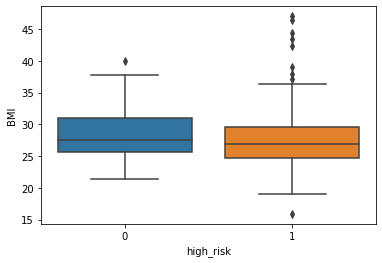

In [152]:
analyse_continuous('BMI')